In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
#We start with a new approach using the fact that a complete network with k pieces can be represented by a nxk matrix.
n= 10 #Number of users
k =5 #Number of file pieces
pmatrix= np.zeros((n,k))
pmatrix[0] = np.ones(k)
print(pmatrix)
pmatrix[0][0]

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


1.0

In [3]:
oldpmatrix = np.zeros((n,k)) + pmatrix#This forces python to create a new matrix. Otherwise it would refer oldpmatrix to pmatrix
for i in range(n):
    rowfinder= sum(oldpmatrix[i])
    if rowfinder>= 1:
        f = []
        for j in range(k):
            if oldpmatrix[i][j] == 1:
                f.append(j)
        chosepiece =rnd.choice(f)
        chosenode =rnd.randrange(n)
        while chosenode == i:
            chosenode =rnd.randrange(n)
        pmatrix[chosenode][chosepiece] = 1
        
print(pmatrix)

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [4]:
#Setup test
n= 10
k =5
pmatrix= np.zeros((n,k))
pmatrix[0] = np.ones(k)
print(pmatrix)


[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [5]:
#Indicator test
I = 0
oldpmatrix = np.zeros((n,k)) + pmatrix
for i in range(n):
    if sum(oldpmatrix[i])>= 1:
        f = []
        for j in range(k):
            if oldpmatrix[i][j] == 1:
                f.append(j)
        chosepiece =rnd.choice(f)
        chosenode =rnd.randrange(n)
        while chosenode == i:
            chosenode =rnd.randrange(n)
        pmatrix[chosenode][chosepiece] = 1
if sum(sum(pmatrix)) == n*k:
    I= 1
print(pmatrix)
print(sum(sum(pmatrix)))
print(I)

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
6.0
0


In [6]:
def pushprot(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0

    while I ==0:
        oldpmatrix = np.zeros((n,k)) + pmatrix #Using two matrices
        for i in range(n): #For every row
            if sum(oldpmatrix[i])>= 1: #If there is a 1
                f = [] #Create empty 1s vector
                for j in range(k): #for every element in the row
                    if oldpmatrix[i][j] == 1: #if we find a 1 append the index of it
                        f.append(j)
                chosepiece =rnd.choice(f) #choose random 1 in row
                chosenode =rnd.randrange(n) #choose a random target
                while chosenode == i: #ensuring target node is not the user
                    chosenode =rnd.randrange(n) 
                pmatrix[chosenode][chosepiece] = 1 #piece is pushed to random node
        if sum(sum(pmatrix)) == n*k: #Indicator for completion
            I= 1
        count = count +1
    return count

In [7]:
pushprot(100,10)

118

In [14]:
#Code for generating data. In this case we are looking at how the number of users affects completion time.
x=[] 
y_av=[] # Note here we are calculating average values for each completion time.
for l in range(10,1000,100): #Number of users go up to 1000 in steps of 100.
    ys=0
    x.append(l)
    for z in range(14):
        ys= ys + pushprot(l,10) #Number of pieces is kept  fixed in this case = 10.
    y_av.append(ys/(z+1))
    

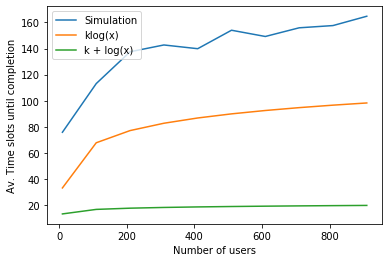

In [15]:
plt.figure()
plt.plot(x,y_av,label= "Simulation")
plt.plot(x,(np.log2(x)*10),label = "klog(x)") #Comparison to inefficient model
plt.plot(x,10 + np.log2(x), label ="k + log(x)")
plt.xlabel("Number of users")
plt.ylabel("Av. Time slots until completion")
plt.legend()

In [6]:
#Code for generating data. In this case we are looking at how the number of file pieces affects completion time.
y_av2=[] 
x2=[]
for l in range(10,100,10): #Number of pieces goes up to 100 in 10 steps
    ys2=0
    x2.append(l)
    for z in range(9):
        ys2= ys2 + pushprot(10,l) #Number of users is kept fixed 10
    y_av2.append(ys2/(z+1))

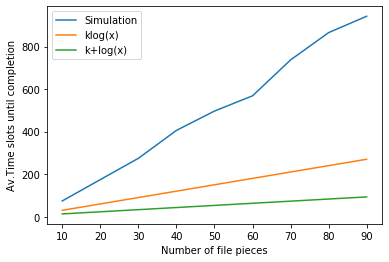

In [7]:
plt.figure()
lognum = int(np.log2(10))
plt.plot(x2,y_av2, label = "Simulation")
plt.plot(x2,np.array(x2)*(lognum), label = "klog(x)")
plt.plot(x2,np.array(x2) + lognum, label ="k+log(x)")
plt.xlabel("Number of file pieces")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [45]:
plt.figure()
gradvec = np.array(y_av2)/np.array(x2)
grad = sum(gradvec)/len(gradvec)
print(grad, np.log2(10))

9.627407897315305 3.321928094887362


<Figure size 432x288 with 0 Axes>

In [20]:
#Showing the number of file pieces obtained over time

In [21]:
def pushprot2(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0
    num_of_file =[]
    while I ==0:
        oldpmatrix = np.zeros((n,k)) + pmatrix #Using two matrices
        for i in range(n): #For every row
            if sum(oldpmatrix[i])>= 1: #If there is a 1
                f = [] #Create empty 1s vector
                for j in range(k): #for every element in the row
                    if oldpmatrix[i][j] == 1: #if we find a 1 append the index of it
                        f.append(j)
                chosepiece =rnd.choice(f) #choose random 1 in row
                chosenode =rnd.randrange(n) #choose a random target
                while chosenode == i: #ensuring target node is not the user
                    chosenode =rnd.randrange(n) 
                pmatrix[chosenode][chosepiece] = 1 #piece is pushed to random node
        num_of_file.append(sum(sum(pmatrix))) #count how many pieces in network
        if sum(sum(pmatrix)) == n*k: #Indicator for completion
            I= 1
        count = count +1
    return count, num_of_file

Text(0, 0.5, 'Number of pieces until completion')

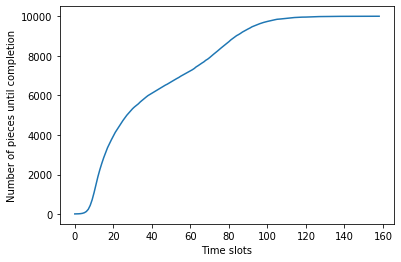

In [22]:
vals = pushprot2(1000,10)
xvals= list(range(vals[0]))
yvals = vals[1]
plt.figure()
plt.plot(xvals,yvals)
plt.xlabel("Time slots")
plt.ylabel("Number of pieces until completion")

In [23]:
#Now for the Pull Protocol

In [16]:
def pullprot(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0

    while I ==0:
        oldpmatrix = np.zeros((n,k)) + np.zeros((n,k)) + pmatrix
        pullpmatrix = np.zeros((n,k))#Using pull matrix to ensure a target is not chosen twice
        for i in range(n): #for every row
            if sum(oldpmatrix[i])< k: #if zeroes in the row
                f = [] #create empty 0s array
                for j in range(k): #for every element in row
                    if oldpmatrix[i][j] == 0:
                        f.append(j) #append index of 0 in row
                chosepiece2 =rnd.choice(f) #choose a random 0 in row
                chosenode2 =rnd.randrange(n) #choose a random target node
                while chosenode2 == i: #Ensuring the random target is not the user
                    chosenode2 =rnd.randrange(n)
                if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0:
                    pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                    pullpmatrix[chosenode2] = np.ones(k) #targetted pull node is serviced
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count

In [17]:
pullprot(100,10)

75

In [18]:
#Code for generating data. In this case we are looking at how the number of users affects completion time.
x3=[] 
y_av3=[] # Note here we are calculating average values for each completion time.
for l in range(10,1000,100): #Number of users go up to 1000 in steps of 100.
    ys3=0
    x3.append(l)
    for z in range(14):
        ys3= ys3 + pullprot(l,10) #Number of pieces is kept  fixed in this case = 10.
    y_av3.append(ys3/(z+1))
    

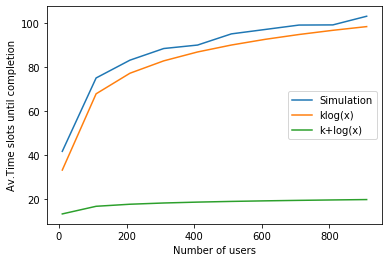

In [19]:
plt.figure()
plt.plot(x3,y_av3, label = "Simulation")
plt.plot(x3,(np.log2(x3)*10), label ="klog(x)") #Comparison to inefficient model
plt.plot(x3,(10 + np.log2(x3)), label = "k+log(x)")
plt.xlabel("Number of users")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [65]:
#Code for generating data. In this case we are looking at how the number of file pieces affects completion time.
y_av4=[] 
x4=[]
for l in range(10,100,10): #Number of pieces goes up to 100 in 10 steps
    ys4=0
    x4.append(l)
    for z in range(9):
        ys4= ys4 + pullprot(10,l) #Number of users is kept fixed 10
    y_av4.append(ys4/(z+1))

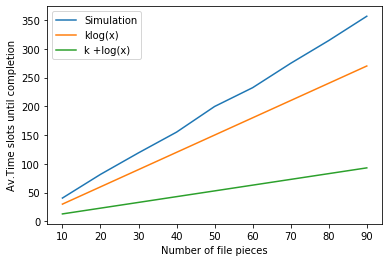

In [66]:
plt.figure()
lognum = int(np.log2(10))
plt.plot(x4,y_av4,label = "Simulation")
plt.plot(x4,np.array(x4)*(lognum), label = "klog(x)")
plt.plot(x4,np.array(x4) + lognum, label = "k +log(x)")
plt.xlabel("Number of file pieces")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [67]:
plt.figure()
gradvec = np.array(y_av4)/np.array(x4)
grad = sum(gradvec)/len(gradvec)
print(grad, np.log2(10))

3.962741524593376 3.321928094887362


<Figure size 432x288 with 0 Axes>

In [30]:
#Showing the number of pieces over time

In [31]:
def pullprot2(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0
    num_of_file2 = []

    while I ==0:
        oldpmatrix = np.zeros((n,k)) + np.zeros((n,k)) + pmatrix
        pullpmatrix = np.zeros((n,k))#Using pull matrix to ensure a target is not chosen twice
        for i in range(n): #for every row
            if sum(oldpmatrix[i])< k: #if zeroes in the row
                f = [] #create empty 0s array
                for j in range(k): #for every element in row
                    if oldpmatrix[i][j] == 0:
                        f.append(j) #append index of 0 in row
                chosepiece2 =rnd.choice(f) #choose a random 0 in row
                chosenode2 =rnd.randrange(n) #choose a random target node
                while chosenode2 == i: #Ensuring the random target is not the user
                    chosenode2 =rnd.randrange(n)
                if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0:
                    pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                    pullpmatrix[chosenode2] = np.ones(k)
        num_of_file2.append(sum(sum(pmatrix)))
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count, num_of_file2

Text(0, 0.5, 'Number of pieces until completion')

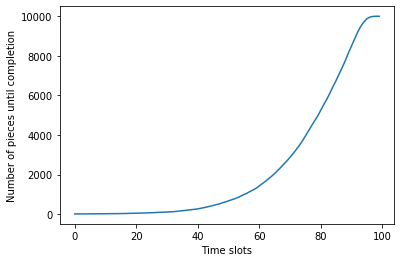

In [32]:
vals2 = pullprot2(1000,10)
xvals2= list(range(vals2[0]))
yvals2 = vals2[1]
plt.figure()
plt.plot(xvals2,yvals2)
plt.xlabel("Time slots")
plt.ylabel("Number of pieces until completion")

In [33]:
#Now let's try an alternative version of Interleave, using the random pull and random push.

In [47]:
def combinedinter(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0

    while I ==0:
        oldpmatrix = np.zeros((n,k)) + np.zeros((n,k)) + pmatrix
        if (count/2) == np.floor(count/2): #On even counts we have pull requests
            pullpmatrix = np.zeros((n,k))#Using pull matrix to ensure a target is not chosen twice
            for i in range(n): #for every row
                if sum(oldpmatrix[i])< k: #if zeroes in the row
                    f = [] #create empty 0s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 0:
                            f.append(j) #append index of 0 in row
                    chosepiece2 =rnd.choice(f) #choose a random 0 in row
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0: 
                        pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                        pullpmatrix[chosenode2] = np.ones(k) #Target has now been serviced in this time slot
        else: #On odd time slots we have push requests
            for i in range(n): #for every row
                if sum(oldpmatrix[i])>= 1: #if ones in the row
                    f = [] #create empty 1s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 1:
                            f.append(j) #append index of 1 in row
                    chosepiece2 =rnd.choice(f) #choose a random 1 in row
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    pmatrix[chosenode2][chosepiece2] = 1 #Push the piece to the target
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count

In [48]:
combinedinter(100,10)

63

In [49]:
#Code for generating data. In this case we are looking at how the number of users affects completion time.
x5=[] 
y_av5=[] # Note here we are calculating average values for each completion time.
for l in range(10,1000,100): #Number of users go up to 1000 in steps of 100.
    ys5=0
    x5.append(l)
    for z in range(14):
        ys5= ys5 + combinedinter(l,10) #Number of pieces is kept  fixed in this case = 10.
    y_av5.append(ys5/(z+1))
    

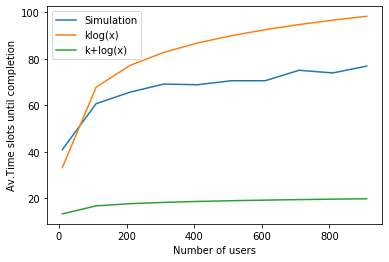

In [50]:
plt.figure()
plt.plot(x5,y_av5, label = "Simulation")
plt.plot(x5,(np.log2(x5)*10), label = "klog(x)") #Comparison to inefficient model with 10 pieces
plt.plot(x5,10 + np.log2(x5), label = "k+log(x)") #Comparison to efficient model with 10 pieces
plt.xlabel("Number of users")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [51]:
#Code for generating data. In this case we are looking at how the number of file pieces affects completion time.
y_av6=[] 
x6=[]
for l in range(10,100,10): #Number of pieces goes up to 100 in 10 steps
    ys6=0
    x6.append(l)
    for z in range(9):
        ys6= ys6 + combinedinter(10,l) #Number of users is kept fixed 10
    y_av6.append(ys6/(z+1))

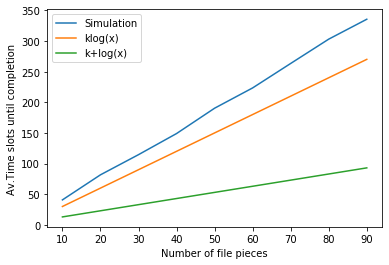

In [52]:
plt.figure()
lognum = int(np.log2(10))
plt.plot(x6,y_av6, label = "Simulation")
plt.plot(x6,np.array(x6)*lognum, label = "klog(x)")
plt.plot(x6,(np.array(x6) + lognum), label = "k+log(x)")
plt.xlabel("Number of file pieces")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [65]:
plt.figure()
gradvec = np.array(y_av6)/np.array(x6)
grad = sum(gradvec)/len(gradvec)
print(grad, np.log2(10))

3.8346595140113657 3.321928094887362


<Figure size 432x288 with 0 Axes>

In [40]:
#Showing number of pieces over time

In [66]:
def combinedinter2(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0
    num_of_pieces = []

    while I ==0:
        oldpmatrix = np.zeros((n,k)) + np.zeros((n,k)) + pmatrix
        if (count/2) == np.floor(count/2): #On even counts we have pull requests
            pullpmatrix = np.zeros((n,k))#Using pull matrix to ensure a target is not chosen twice
            for i in range(n): #for every row
                if sum(oldpmatrix[i])< k: #if zeroes in the row
                    f = [] #create empty 0s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 0:
                            f.append(j) #append index of 0 in row
                    chosepiece2 =rnd.choice(f) #choose a random 0 in row
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0:
                        pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                        pullpmatrix[chosenode2] = np.ones(k) #if target has piece and is unserviced, pull
        else: #On odd time slots we have push requests
            for i in range(n): #for every row
                if sum(oldpmatrix[i]) >= 1: #if ones in the row
                    f = [] #create empty 1s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 1:
                            f.append(j) #append index of 1 in row
                    chosepiece2 =rnd.choice(f) #choose a random 1 in row
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    pmatrix[chosenode2][chosepiece2] = 1
        num_of_pieces.append(sum(sum(pmatrix)))
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count , num_of_pieces

Text(0, 0.5, 'Number of pieces until completion')

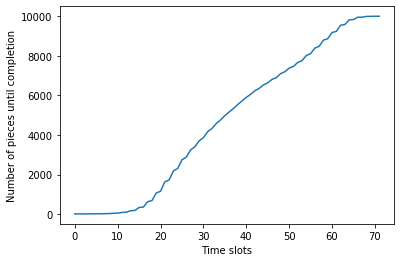

In [67]:
vals3 = combinedinter2(1000,10)
xvals3= list(range(vals3[0]))
yvals3 = vals3[1]
plt.figure()
plt.plot(xvals3,yvals3)
plt.xlabel("Time slots")
plt.ylabel("Number of pieces until completion")

In [57]:
#Attempt at Interleave. Note there is a 0-1 error going from the code to the paper. Time slot 1 is count 0

In [58]:
def interleave(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0

    evenmatrix = np.zeros((n,k)) + np.zeros((n,k)) +pmatrix #Matrix to keep track of what happens on even counts
    oldevenmatrix = np.zeros((n,k)) + np.zeros((n,k)) +np.zeros((n,k)) +pmatrix
    while I ==0:
        oldpmatrix = np.zeros((n,k)) + pmatrix #Using old matrix and new matrix- this updates in while loop
        if (count/2) == np.floor(count/2): #On even counts we have push requests
            oldevenmatrix = np.zeros((n,k)) + evenmatrix
            evencount = int((count)/2)
            if evencount <=(k-1): #Note this is the push rule for the source. Push pieces 0,1,2,3,... on each even count           
                sourcenode = rnd.randrange(n)
                while sourcenode == 0: 
                    sourcenode =rnd.randrange(n) 
                pmatrix[sourcenode][evencount] = 1 #piece from source pushed to user
                evenmatrix[sourcenode][evencount] = 1
            for i in range(1,n): #For every row ###THAT ISN'T THE SOURCE NODE###We push pieces received in even counts
                if sum(oldevenmatrix[i])>= 1: #If there is a 1
                    f = [] #Create empty 1s vector
                    for j in range(k): #for every element in the row
                        if oldevenmatrix[i][j] == 1: #if we find a 1 append the index of it
                            f.append(j)
                    chosepiece =np.max(f) #push the 1 with the largest index in row ####PRIORITY PUSH####
                    chosenode =rnd.randrange(n) #choose a random target
                    while chosenode == i: #ensuring target node is not the user
                        chosenode =rnd.randrange(n) 
                    pmatrix[chosenode][chosepiece] = 1 #piece is pushed to random node
                    evenmatrix[chosenode][chosepiece] = 1 #Even count matrix updated
        else:#On odd counts we have pull requests
            pullpmatrix = np.zeros((n,k))
            for i in range(n): #for every row
                if sum(oldpmatrix[i])< k: #if zeroes in the row
                    f = [] #create empty 0s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 0:
                            f.append(j) #append index of 0 in row
                    chosepiece2 = np.min(f) #pull a 1 according to the smallest index of 0 in row ####SEQUENTIAL PULL####
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0:
                        pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                        pullpmatrix[chosenode2]= np.ones(k) #targetted pull node has been serviced
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count

In [59]:
interleave(100,10)

39

In [60]:
#Code for generating data. In this case we are looking at how the number of users affects completion time.
x7=[] 
y_av7=[] # Note here we are calculating average values for each completion time.
for l in range(10,1000,100): #Number of users go up to 1000 in steps of 100.
    ys7=0
    x7.append(l)
    for z in range(4):
        ys7= ys7 + interleave(l,10) #Number of pieces is kept  fixed in this case = 10.
    y_av7.append(ys7/(z+1))
    

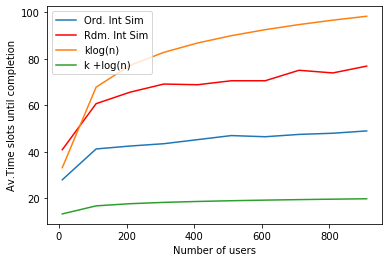

In [71]:
plt.figure()
plt.plot(x7,y_av7, label ="Ord. Int Sim")
plt.plot(x5,y_av5, color="red", label = "Rdm. Int Sim")
plt.plot(x7,(np.log2(x7)*10), label = "klog(n)") #Comparison to inefficient model with 10 pieces 
plt.plot(x7,(10 + np.log2(x7)), label = "k +log(n)") #Comparison to efficient model with 10 pieces 
plt.ylabel("Av.Time slots until completion")
plt.xlabel("Number of users")
plt.legend()

In [62]:
#Code for generating data. In this case we are looking at how the number of file pieces affects completion time.
y_av8=[] 
x8=[]
for l in range(10,100,10): #Number of pieces goes up to 100 in 10 steps
    ys8=0
    x8.append(l)
    for z in range(9):
        ys8= ys8 + interleave(10,l) #Number of users is kept fixed 10
    y_av8.append(ys8/(z+1))

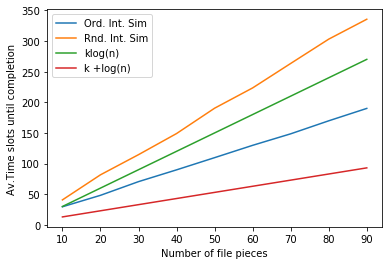

In [63]:
plt.figure()
lognum = int(np.log2(10))
plt.plot(x8,y_av8, label = "Ord. Int. Sim")
plt.plot(x6,y_av6, label = "Rnd. Int. Sim")
plt.plot(x8,np.array(x8)*lognum, label = "klog(n)")
plt.plot(x8,np.array(x8) + lognum, label = "k +log(n)")
plt.xlabel("Number of file pieces")
plt.ylabel("Av.Time slots until completion")
plt.legend()

In [64]:
plt.figure()
gradvec = np.array(y_av8)/np.array(x8)
grad = sum(gradvec)/len(gradvec)
print(grad, np.log2(10))

2.297201646090535 3.321928094887362


<Figure size 432x288 with 0 Axes>

In [50]:
#Showing number of pieces over time

In [51]:
def interleave2(n,k):
    #Setup
    pmatrix= np.zeros((n,k))
    pmatrix[0] = np.ones(k)
    I=0
    count = 0
    num_of_pieces4 = []
    
    evenmatrix = np.zeros((n,k)) + np.zeros((n,k)) +pmatrix #Matrix to keep track of what happens on even counts
    oldevenmatrix = np.zeros((n,k)) + np.zeros((n,k)) +np.zeros((n,k)) +pmatrix
    while I ==0:
        oldpmatrix = np.zeros((n,k)) + pmatrix #Using old matrix and new matrix- this updates in while loop
        if (count/2) == np.floor(count/2): #On even counts we have push requests
            oldevenmatrix = np.zeros((n,k)) + evenmatrix
            evencount = int((count)/2)
            if evencount <=(k-1): #Note this is the push rule for the source. Push pieces 0,1,2,3,... on each even count           
                sourcenode = rnd.randrange(n)
                while sourcenode == 0: 
                    sourcenode =rnd.randrange(n) 
                pmatrix[sourcenode][evencount] = 1 #piece from source pushed to user
                evenmatrix[sourcenode][evencount] = 1
            for i in range(1,n): #For every row ###THAT ISN'T THE SOURCE NODE###We push pieces received in even counts
                if sum(oldevenmatrix[i])>= 1: #If there is a 1
                    f = [] #Create empty 1s vector
                    for j in range(k): #for every element in the row
                        if oldevenmatrix[i][j] == 1: #if we find a 1 append the index of it
                            f.append(j)
                    chosepiece =np.max(f) #push the 1 with the largest index in row ####PRIORITY PUSH####
                    chosenode =rnd.randrange(n) #choose a random target
                    while chosenode == i: #ensuring target node is not the user
                        chosenode =rnd.randrange(n) 
                    pmatrix[chosenode][chosepiece] = 1 #piece is pushed to random node
                    evenmatrix[chosenode][chosepiece] = 1 #Even count matrix updated
        else:#On odd counts we have pull requests
            pullpmatrix = np.zeros((n,k))
            for i in range(n): #for every row
                if sum(oldpmatrix[i])< k: #if zeroes in the row
                    f = [] #create empty 0s array
                    for j in range(k): #for every element in row
                        if oldpmatrix[i][j] == 0:
                            f.append(j) #append index of 0 in row
                    chosepiece2 = np.min(f) #pull a 1 according to the smallest index of 0 in row ####SEQUENTIAL PULL####
                    chosenode2 =rnd.randrange(n) #choose a random target node
                    while chosenode2 == i: #Ensuring the random target is not the user
                        chosenode2 =rnd.randrange(n)
                    if oldpmatrix[chosenode2][chosepiece2] ==1 and pullpmatrix[chosenode2][chosepiece2] == 0:
                        pmatrix[i][chosepiece2] = 1 #if target has piece and is unserviced, success
                        pullpmatrix[chosenode2]= np.ones(k)
        num_of_pieces4.append(sum(sum(pmatrix)))
        if sum(sum(pmatrix)) == n*k: # Indicator for completion
            I= 1
        count = count +1
    return count, num_of_pieces4

Text(0, 0.5, 'Number of pieces until completion')

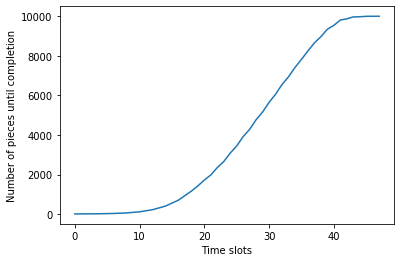

In [52]:
vals4 = interleave2(1000,10)
xvals4= list(range(vals4[0]))
yvals4 = vals4[1]
plt.figure()
plt.plot(xvals4,yvals4)
#plt.plot(xvals3,yvals3)
plt.xlabel("Time slots")
plt.ylabel("Number of pieces until completion")